In [1]:
import os
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy import stats
#import optshrink as opt # package we create
import numpy as np
# import scipy.io as sio
import h5py
import matplotlib.pyplot as plt 
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import seaborn as sns
from shapely.geometry import Point
import geopandas as gp
from geodatasets import get_path
from shapely.geometry import Polygon



In [2]:
output_col_names = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'community_type'
,'subtype'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']




In [3]:
output_dir_path = '/group/moniergrp/TEM_Large_Ensemble/output_files/cru_historical/' 

regions = [
'region_1',
'region_5',
'region_21',
'region_6',
'region_19',
'region_13',
'region_8',
'region_20',
'region_28',
'region_23',
'region_3',
'region_2',
'region_18',
'region_4',
'region_7',
'region_25',
'region_10',
'region_17',
'region_16',
'region_27',
'region_11',
'region_9',
'region_24',
'region_14',
'region_15',
'region_12',
'region_22',
'region_26'
          ]

In [4]:
all_areas = pd.DataFrame()

for region in regions:
    tt = pd.read_csv(output_dir_path+region+'/lat_lon_hist.csv')
    all_areas = pd.concat([all_areas, tt])

In [18]:
all_areas = all_areas.loc[~all_areas['current_veg'].isin([6,19])] ###dropping woodlands
# all_areas = all_areas.loc[all_areas['monthly_mean'].between(-1e6,1e6)] ###dropping woodlands
all_areas = all_areas.loc[all_areas['monthly_mean'].between(-100000,100000)] ###dropping woodlands


In [27]:
all_areas.columns

Index(['lon', 'lat', 'variable', 'forest_type', 'current_veg',
       'community_type', 'silt_clay', 'region', 'run_region', 'land_area',
       'cohort_area', 'monthly_mean_weight', 'Jan_weight', 'Feb_weight',
       'Mar_weight', 'Apr_weight', 'May_weight', 'Jun_weight', 'Jul_weight',
       'Aug_weight', 'Sep_weight', 'Oct_weight', 'Nov_weight', 'Dec_weight',
       'monthly_mean', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [29]:
all_areas.loc[(all_areas['current_veg']== 33)
              &(all_areas['variable']== ' SOILORGC ')
              &(all_areas['run_region']== 'region_13')
              , ['lon', 'lat', 'monthly_mean', 'run_region']]

lon   lat  monthly_mean run_region
7     30.5  37.0        896.73  region_13
18    30.5  37.5        606.60  region_13
260   31.0  36.5       1309.13  region_13
271   31.0  37.0       1407.59  region_13
282   31.0  37.5        715.32  region_13
293   31.0  38.0        953.60  region_13
304   31.0  38.5       1082.61  region_13
513   31.5  36.5       2229.96  region_13
524   31.5  37.0        708.91  region_13
535   31.5  37.5        787.54  region_13
546   31.5  38.0       1439.09  region_13
557   31.5  38.5       1168.04  region_13
733   32.0  36.5       1007.31  region_13
920   32.5  36.5        503.78  region_13
1085  33.0  36.5        536.85  region_13
1283  33.5  36.5        632.64  region_13
2130  36.0  37.0        767.06  region_13
2141  36.0  37.5       2002.32  region_13
2350  36.5  37.0        558.48  region_13
2361  36.5  37.5        962.87  region_13
2526  37.0  37.0         48.50  region_13
2537  37.0  37.5        236.71  region_13
2691  37.5  37.0         20.23  region_13
2702  37.5  37.5         28.38  region_13
4066  44.0  36.5         33.58  region_13
4132  44.5  36.5         47.64  region_13
4440  47.0  38.0         68.64  region_13
4451  47.0  38.5        507.09  region_13
4473  47.5  38.0         73.12  region_13
4484  47.5  38.5       1069.78  region_13

In [17]:
all_areas.describe()

lon            lat    current_veg  community_type  \
count  304388.000000  304388.000000  304388.000000   304388.000000   
mean       15.410552      30.991673      11.063265       11.336469   
std        85.356852      26.510796       7.005606        6.912700   
min      -177.000000     -56.000000       4.000000        4.000000   
25%       -70.000000       8.000000       5.000000        5.000000   
50%        19.000000      40.000000       8.000000       10.000000   
75%       100.000000      52.000000      16.000000       16.000000   
max       179.500000      69.500000      33.000000       33.000000   

           silt_clay     land_area    cohort_area  monthly_mean_weight  \
count  304388.000000  3.043880e+05  304388.000000         3.043880e+05   
mean       57.534768  4.712378e+07  484655.412349         1.139252e+09   
std         9.646786  6.539522e+07  298610.204063         3.496057e+09   
min        12.060000  1.620000e+02       4.000000        -3.518359e+08   
25%        51.940000  1.425816e+06  235028.000000         1.490482e+06   
50%        58.430000  1.681928e+07  481788.000000         1.983672e+07   
75%        63.830000  7.074400e+07  700872.000000         3.016586e+08   
max        94.530000  5.404530e+08  995302.000000         3.246460e+11   

         Jan_weight    Feb_weight  ...           Mar            Apr  \
count  3.043880e+05  3.043880e+05  ...  3.043880e+05  304388.000000   
mean   1.131467e+09  1.125590e+09  ...  2.175316e+03    2187.338084   
std    4.816294e+09  3.529671e+09  ...  6.371270e+03    6336.300245   
min   -3.086346e+08 -2.297555e+08  ... -1.173220e+03   -1164.290000   
25%   -1.531034e+05 -1.585874e+05  ...  2.000000e-02       4.440000   
50%    6.641089e+06  5.846811e+06  ...  2.825000e+01      38.690000   
75%    2.759087e+08  2.806108e+08  ...  8.500375e+02     854.600000   
max    1.801940e+12  4.756743e+11  ...  1.012385e+06  965946.050000   

                 May            Jun            Jul            Aug  \
count  304388.000000  304388.000000  304388.000000  304388.000000   
mean     2221.379077    2254.426228    2272.825974    2265.988445   
std      6307.626461    6288.348930    6271.667737    6259.172383   
min     -1179.980000   -1261.070000   -1857.040000   -2177.680000   
25%        23.510000      24.910000      22.580000      17.570000   
50%        90.985000     112.090000     114.110000     101.285000   
75%       968.260000    1115.157500    1174.090000    1189.910000   
max    967069.980000  969320.910000  969484.270000  969066.730000   

                 Sep            Oct            Nov            Dec  
count  304388.000000  304388.000000  304388.000000  304388.000000  
mean     2239.108648    2208.481871    2186.378587    2179.117206  
std      6252.119556    6252.464905    6253.970801    6255.657314  
min     -2133.140000   -1903.440000   -1668.460000   -1555.370000  
25%        10.380000       2.580000       0.000000      -1.440000  
50%        73.280000      41.670000      27.760000      25.700000  
75%      1088.675000     876.320000     815.992500     800.080000  
max    969315.720000  969520.820000  969315.250000  969047.550000  

[8 rows x 33 columns]

In [6]:
all_years = pd.DataFrame()

for region in regions:
    tt = pd.read_csv(output_dir_path+region+'/year_hist.csv')
    all_years = pd.concat([all_years, tt])

In [7]:
all_years[['forest_type','current_veg'
,'community_type']].value_counts()

forest_type                              current_veg  community_type
Boreal Forest                            4            4                 70840
Mixed Temperate Forests                  8            9                 67298
Tropical Evergreen Forests               16           16                67298
Mixed Temperate Forests                  8            10                67298
Xeromorphic Forests and Woodlands        19           19                67298
Temperate Deciduous Forests              10           10                63756
Tropical Deciduous Forests               18           18                63756
Mixed Temperate Forests                  8            8                 61149
Temperate Broadleaved Evergreen Forests  33           33                60214
Temperate Coniferous Forests             9            9                 56672
Boreal Woodlands                         6            3                 53130
                                                      4                 5

In [8]:
all_years = all_years.loc[~all_years['current_veg'].isin([6,19])] ###dropping woodlands
all_years = all_years.loc[all_years['monthly_mean'].between(-1e8,1e8)] ###dropping woodlands
all_years.loc[all_years['community_type'].isin([4,5]), 'PFT_group'] = 'Boreal'
all_years.loc[all_years['community_type'].isin([17,20,16,18]), 'PFT_group'] = 'Tropical'
all_years.loc[all_years['community_type'].isin([10,11,25]), 'PFT_group'] = 'Temperate Deciduous'
all_years.loc[all_years['community_type'].isin([9,8]), 'PFT_group'] = 'Temperate Coniferous'
all_years.loc[all_years['community_type'].isin([33]), 'PFT_group'] = 'Temperate Broadleaf'
all_years.loc[all_years['PFT_group'].isna()]

Empty DataFrame
Columns: [year, variable, forest_type, current_veg, community_type, run_region, land_area, cohort_area, monthly_mean_weight, Jan_weight, Feb_weight, Mar_weight, Apr_weight, May_weight, Jun_weight, Jul_weight, Aug_weight, Sep_weight, Oct_weight, Nov_weight, Dec_weight, monthly_mean, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, PFT_group]
Index: []

[0 rows x 35 columns]

In [21]:
all_years = all_years.loc[all_years['monthly_mean'].between(-100000,100000)] ###dropping woodlands


In [9]:
all_years=all_years.groupby(['year', 'variable', 'PFT_group'])[all_years.columns[all_years.columns.str.contains('weight|area')]
        ].sum().reset_index()


all_years['monthly_mean'] = (all_years['monthly_mean_weight']/ all_years['cohort_area'])
all_years['Jan'] = (all_years['Jan_weight']/ all_years['cohort_area'])
all_years['Feb'] = (all_years['Feb_weight']/ all_years['cohort_area'])
all_years['Mar'] = (all_years['Mar_weight']/ all_years['cohort_area'])
all_years['Apr'] = (all_years['Apr_weight']/ all_years['cohort_area'])
all_years['May'] = (all_years['May_weight']/ all_years['cohort_area'])
all_years['Jun'] = (all_years['Jun_weight']/ all_years['cohort_area'])
all_years['Jul'] = (all_years['Jul_weight']/ all_years['cohort_area'])
all_years['Aug'] = (all_years['Aug_weight']/ all_years['cohort_area'])
all_years['Sep'] = (all_years['Sep_weight']/ all_years['cohort_area'])
all_years['Oct'] = (all_years['Oct_weight']/ all_years['cohort_area'])
all_years['Nov'] = (all_years['Nov_weight']/ all_years['cohort_area'])
all_years['Dec'] = (all_years['Dec_weight']/ all_years['cohort_area'])


In [10]:
variable_units = ['mgN', 'gC/m2/month', '', 'gC/m2/month?','gC/m2/month?','mgN','gC/m2/month', 'gC/m2','gC/m2','gC/m2/month', '%']

In [19]:

map_data = gp.GeoDataFrame(
    all_areas, geometry=gp.points_from_xy(all_areas.lon, all_areas.lat)
    , crs="EPSG:4326"
)


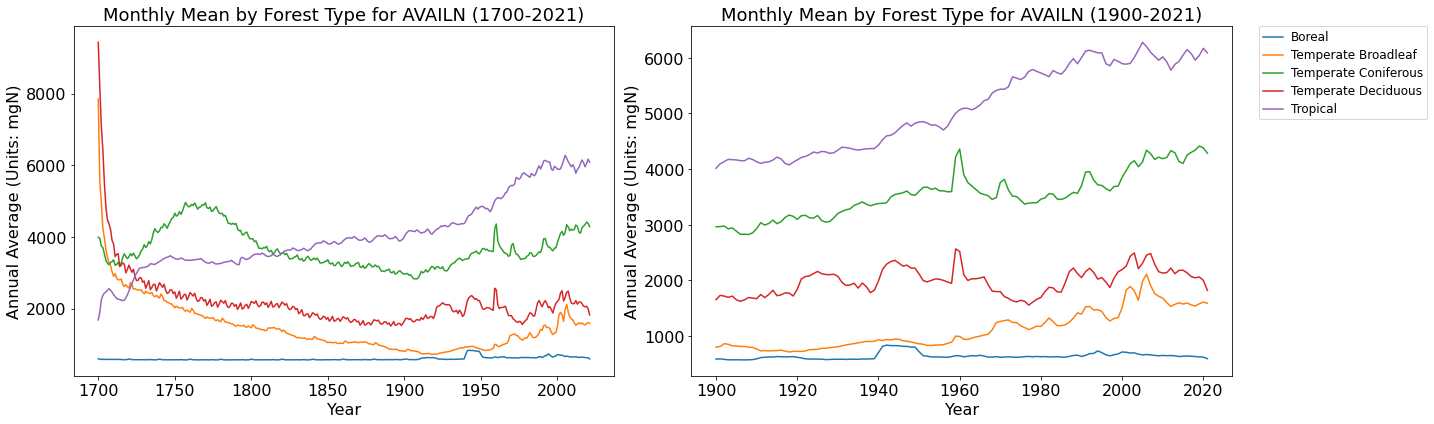

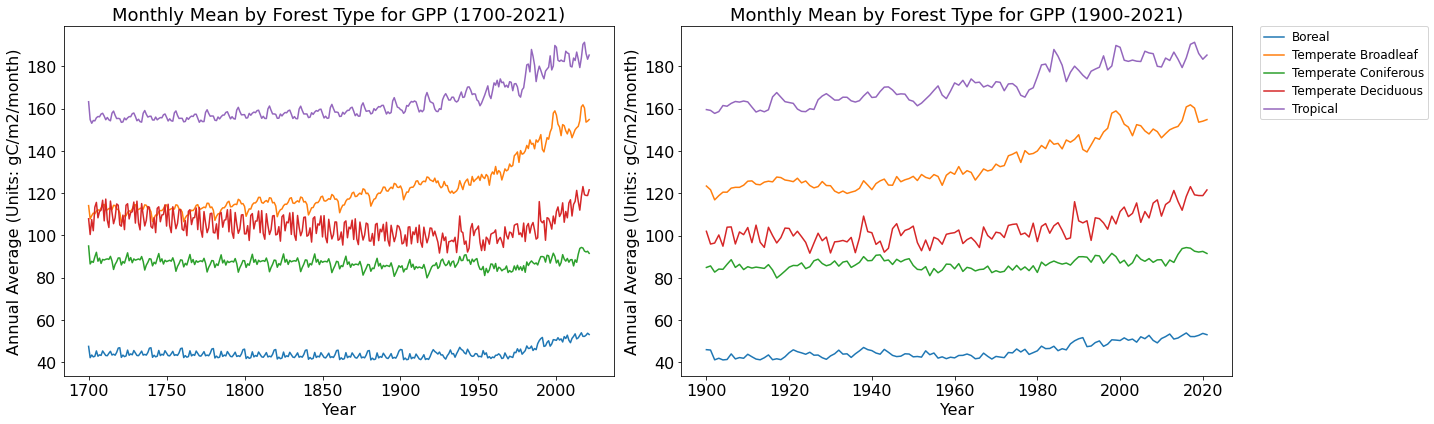

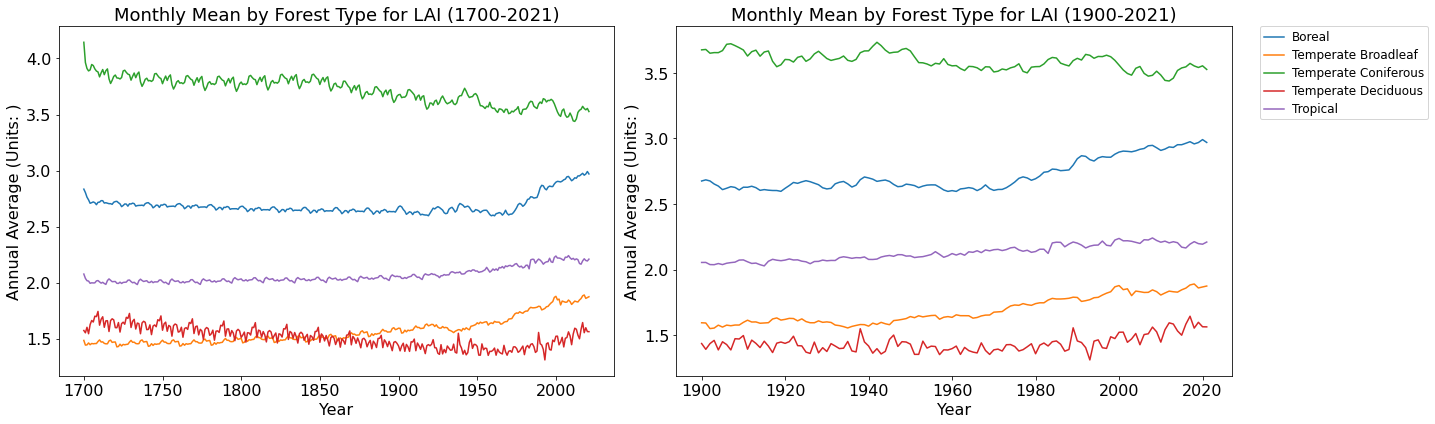

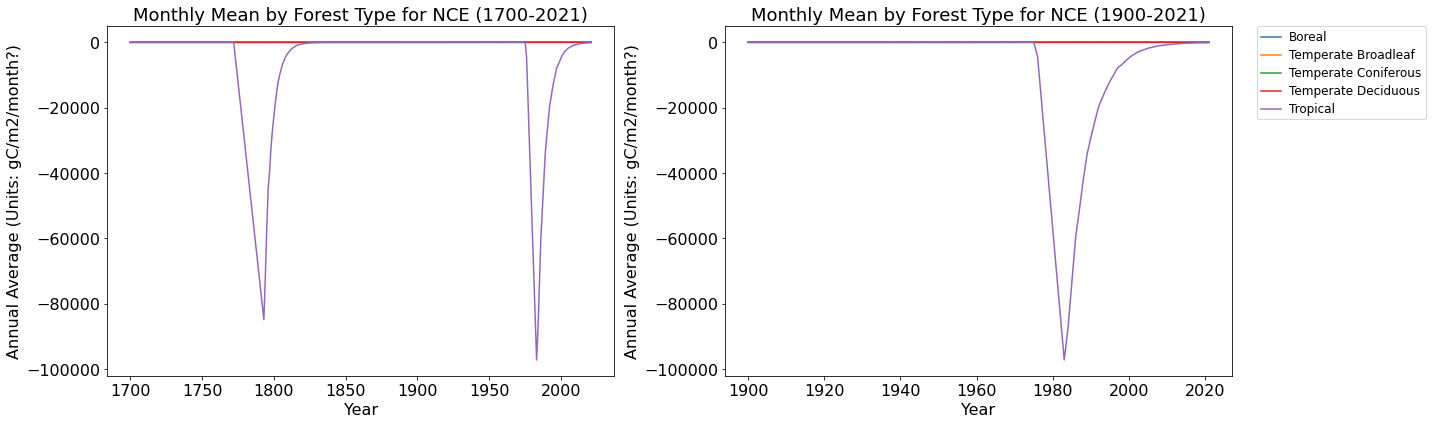

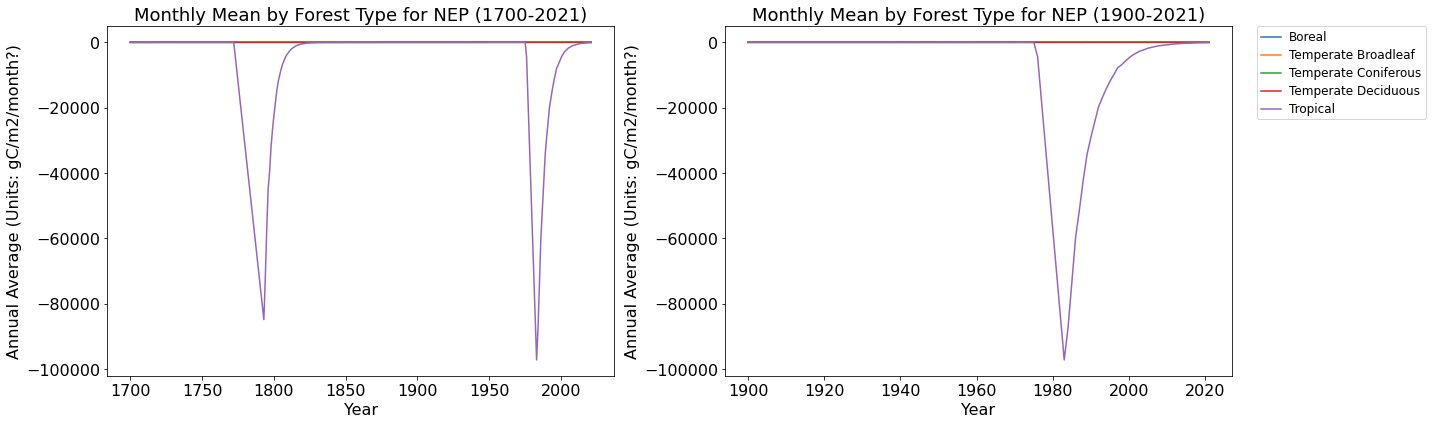

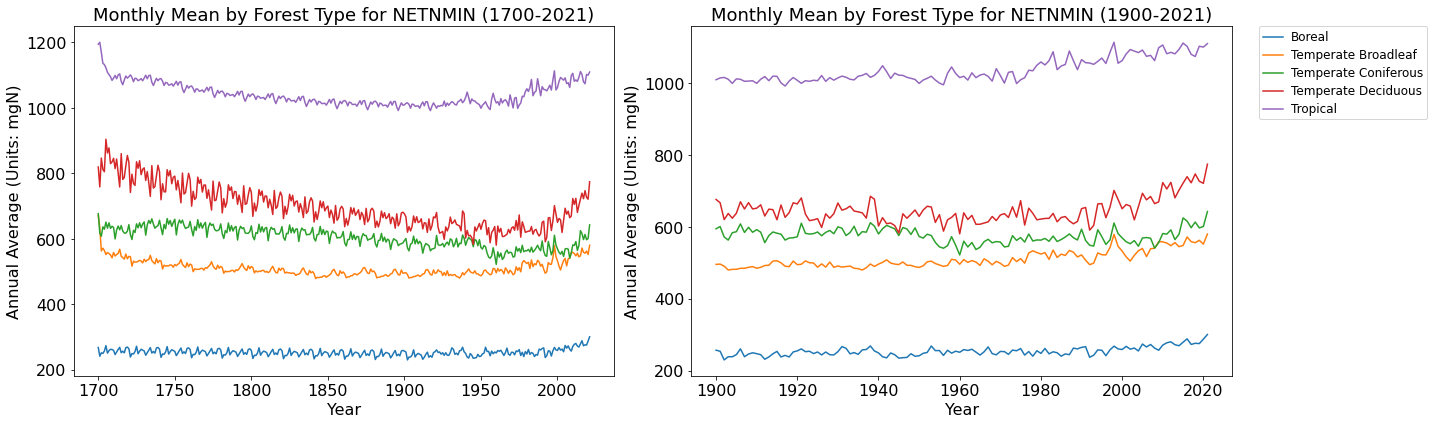

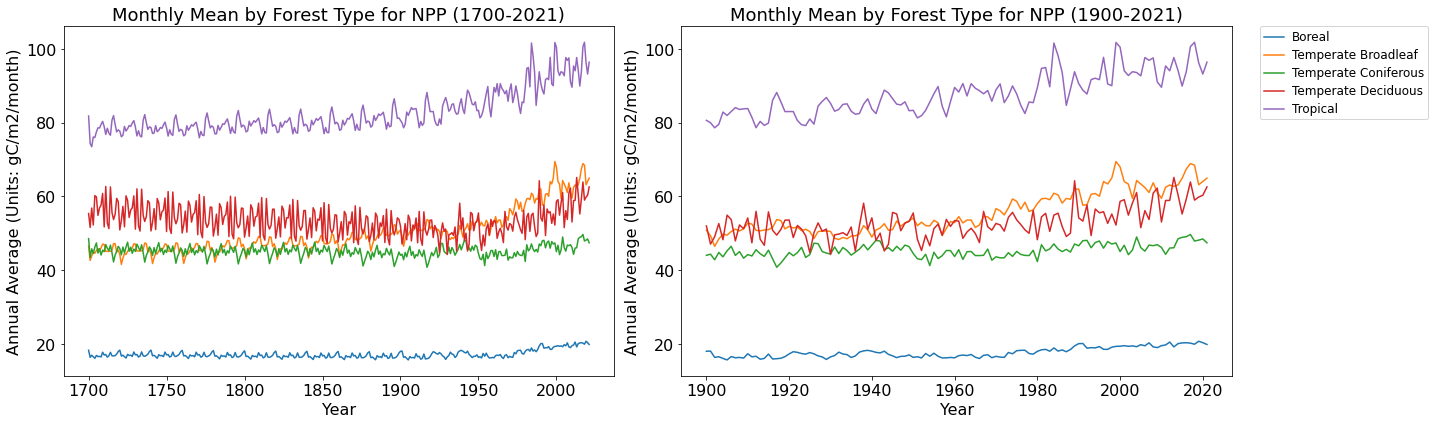

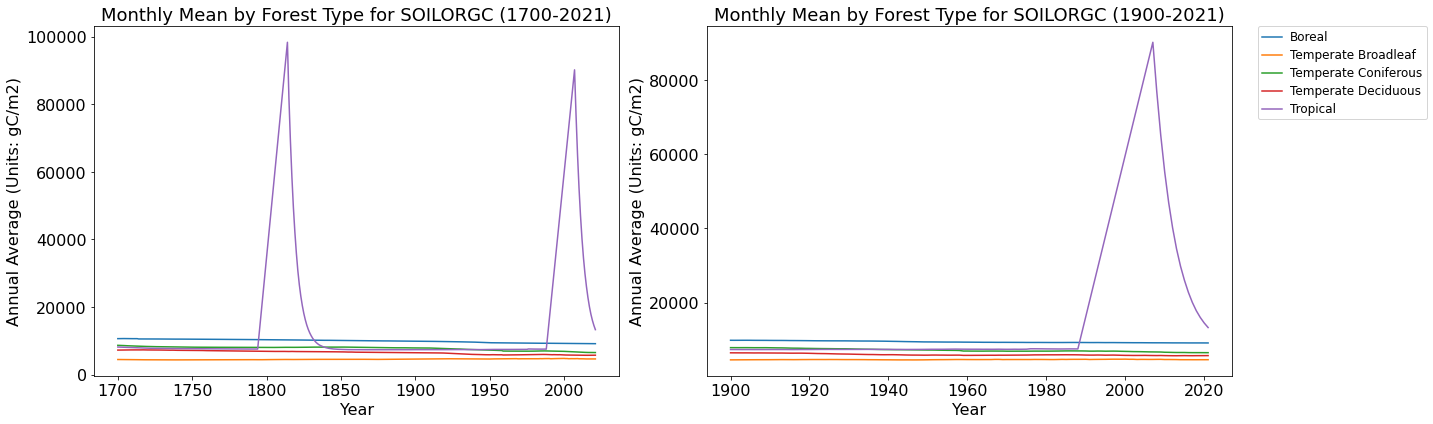

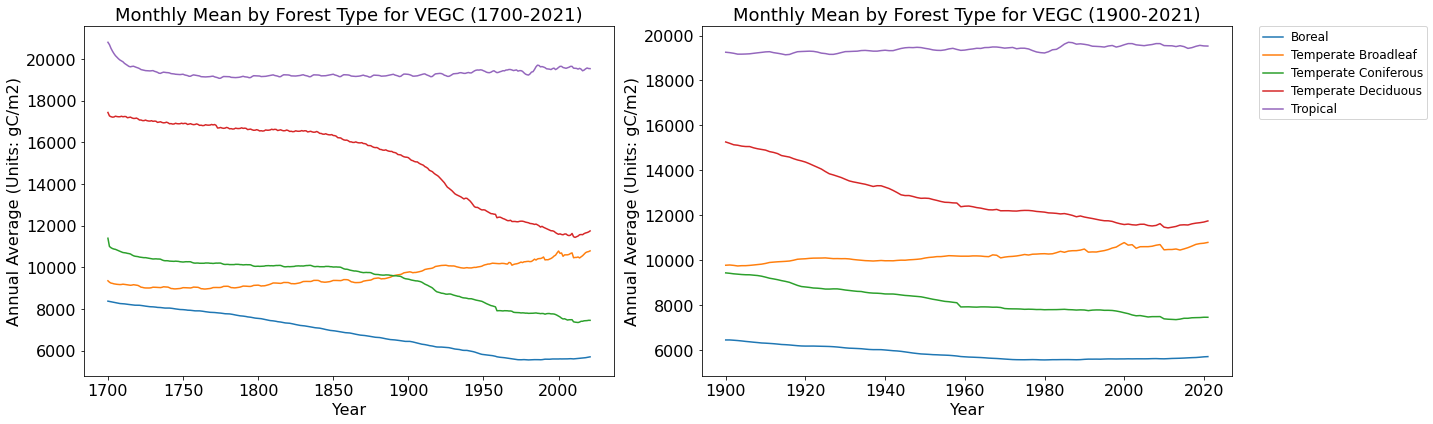

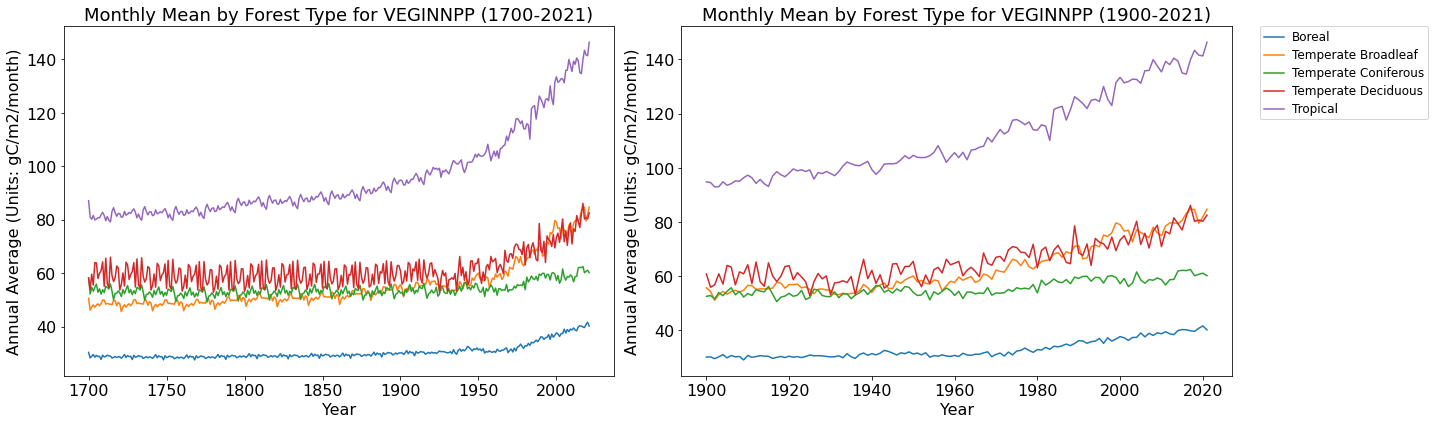

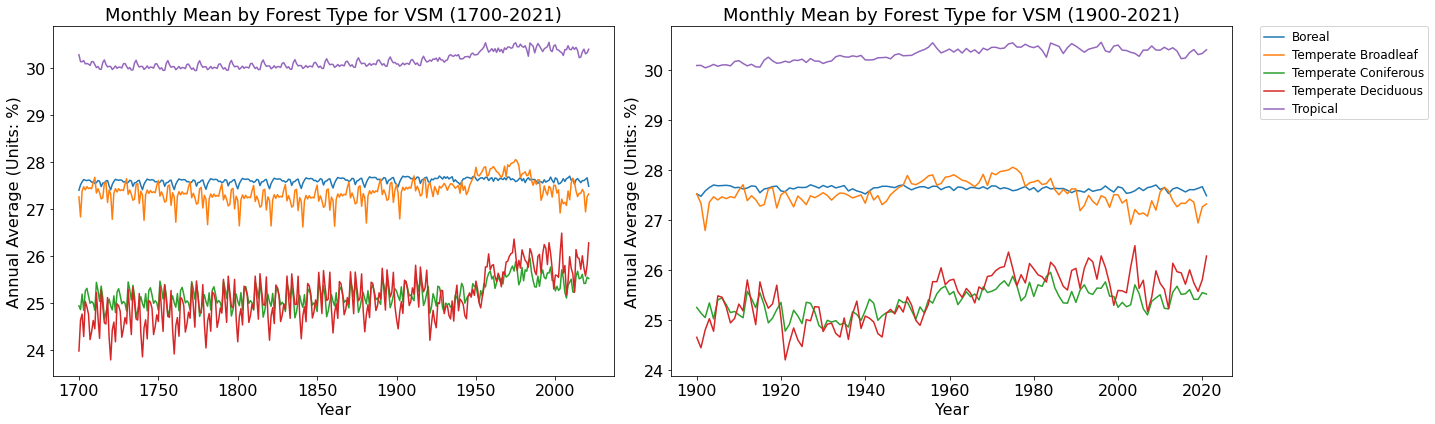

In [22]:
variable_columns = map_data['variable'].unique()

# Loop through each unique variable and create subplot for full and subset time periods.
for i in range(len(variable_columns)):
    # Create a subplot with 2 columns: one for full time period, one for subset.
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=False)
    var = variable_columns[i]
    units = variable_units[i]
    # Select the data for the current variable excluding 'Xero' forest types.
    ts_plot_full = all_years.loc[(all_years['variable'] == var)
                                 ].reset_index()
    
    # Subset of the data for the specified time period.
    ts_plot_subset = ts_plot_full.loc[ts_plot_full['year'] >= 1900]

    # Plot the full data on the first subplot (left column).
    sns.lineplot(data=ts_plot_full, x='year', y='monthly_mean', hue='PFT_group', ax=axes[0], legend=False)
    axes[0].set_title(f"Monthly Mean by Forest Type for{var}(1700-2021)", fontsize=18)
    # axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axes[0].tick_params(labelsize=16)  # Increase size of tick labels
    axes[0].set_xlabel('Year', fontsize=16)  # Increase x-axis label size
    axes[0].set_ylabel(f'Annual Average (Units: {units})', fontsize=16)  # Increase y-axis label size

    # Plot the subset data on the second subplot (right column).
    sns.lineplot(data=ts_plot_subset, x='year', y='monthly_mean', hue='PFT_group', ax=axes[1])
    axes[1].set_title(f"Monthly Mean by Forest Type for{var}(1900-2021)", fontsize=18)
    leg = axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    for text in leg.get_texts():  # Increase legend text font size
        text.set_fontsize(12)    
    axes[1].tick_params(labelsize=16)  # Increase size of tick labels
    axes[1].set_xlabel('Year', fontsize=16)  # Increase x-axis label size
    axes[1].set_ylabel(f'Annual Average (Units: {units})', fontsize=16)  # Increase y-axis label size

    # Adjust the layout so that the subplots fit into the figure area.
    plt.tight_layout()

    # Optionally save the plot to a file (uncomment to use this feature).
    # plt.savefig(f"subplot_{var}.png", bbox_inches='tight')
    
    plt.show()  # Show the plot.


In [102]:
map_data

lon   lat    variable                              forest_type  \
0     -177.0 -44.0     AVAILN   Temperate Broadleaved Evergreen Forests   
1     -177.0 -44.0        GPP   Temperate Broadleaved Evergreen Forests   
2     -177.0 -44.0        LAI   Temperate Broadleaved Evergreen Forests   
3     -177.0 -44.0        NCE   Temperate Broadleaved Evergreen Forests   
4     -177.0 -44.0        NEP   Temperate Broadleaved Evergreen Forests   
...      ...   ...         ...                                      ...   
23502   60.0  64.5        NPP                             Boreal Forest   
23503   60.0  64.5   SOILORGC                             Boreal Forest   
23504   60.0  64.5       VEGC                             Boreal Forest   
23505   60.0  64.5   VEGINNPP                             Boreal Forest   
23506   60.0  64.5        VSM                             Boreal Forest   

       current_veg  community_type  silt_clay        region run_region  \
0               33              33      71.21   New_Zealand   region_1   
1               33              33      71.21   New_Zealand   region_1   
2               33              33      71.21   New_Zealand   region_1   
3               33              33      71.21   New_Zealand   region_1   
4               33              33      71.21   New_Zealand   region_1   
...            ...             ...        ...           ...        ...   
23502            4               4      53.21        Russia  region_24   
23503            4               4      53.21        Russia  region_24   
23504            4               4      53.21        Russia  region_24   
23505            4               4      53.21        Russia  region_24   
23506            4               4      53.21        Russia  region_24   

       land_area  ...      Apr      May      Jun      Jul      Aug      Sep  \
0        2824350  ...   181.94   182.38   183.02   183.53   184.62   185.04   
1        2824350  ...   139.87    95.25    67.23    62.52    67.15   104.35   
2        2824350  ...     2.05     2.04     2.01     1.97     1.92     1.90   
3        2824350  ...   -13.38   -35.19   -46.25   -37.85   -25.50     2.90   
4        2824350  ...   -13.34   -35.16   -46.21   -37.82   -25.47     2.93   
...          ...  ...      ...      ...      ...      ...      ...      ...   
23502    1315364  ...    -0.44    10.48    34.30    35.98    26.15    13.20   
23503    1315364  ...  9248.01  9248.04  9233.68  9208.07  9191.86  9187.66   
23504    1315364  ...  2550.49  2552.55  2578.09  2604.35  2620.41  2623.81   
23505    1315364  ...     0.59    22.46    71.08    82.51    59.19    22.51   
23506    1315364  ...    24.54    24.92    25.53    25.22    25.06    25.08   

           Oct      Nov      Dec                      geometry  
0       187.06   184.69   182.04  POINT (-177.00000 -44.00000)  
1       166.64   226.00   274.18  POINT (-177.00000 -44.00000)  
2         2.10     2.16     2.17  POINT (-177.00000 -44.00000)  
3        37.89    21.53    33.36  POINT (-177.00000 -44.00000)  
4        37.93    21.56    33.40  POINT (-177.00000 -44.00000)  
...        ...      ...      ...                           ...  
23502    -3.24    -1.38    -1.14     POINT (60.00000 64.50000)  
23503  9194.06  9203.08  9212.55     POINT (60.00000 64.50000)  
23504  2610.57  2599.69  2588.99     POINT (60.00000 64.50000)  
23505    -2.36    -1.38    -1.14     POINT (60.00000 64.50000)  
23506    24.96    24.90    24.86     POINT (60.00000 64.50000)  

[229144 rows x 38 columns]

In [103]:
map_data.loc[map_data['variable'] ==' AVAILN ', 'monthly_mean'].describe()

count     20849.000000
mean       2642.986770
std       12556.276141
min           0.000000
25%         562.620000
50%         814.690000
75%        1883.210000
max      968012.900000
Name: monthly_mean, dtype: float64

In [19]:
avail_n = map_data.loc[map_data['variable'] ==' AVAILN '].groupby(['lon', 'lat', 'forest_type','run_region'])['monthly_mean'].mean().reset_index()
vegc = map_data.loc[map_data['variable'] ==' VEGC '].groupby(['lon', 'lat', 'forest_type','run_region'])['monthly_mean'].mean().reset_index() 

compare = avail_n.merge(vegc, on = ['lon','lat','forest_type','run_region'], suffixes  =('_availn','_vegc'))


In [25]:
compare.groupby('forest_type')['monthly_mean_availn'].quantile(.95)

forest_type
Boreal Forest                                824.619000
Boreal Woodlands                             990.419333
Forested Boreal Wetlands                     617.440000
Mixed Temperate Forests                     5494.089333
Temperate Broadleaved Evergreen Forests     3821.951500
Temperate Coniferous Forests                8800.306500
Temperate Deciduous Forests                 4622.835000
Temperate Forested Floodplains              7923.002500
Temperate Forested Wetlands                 4829.210000
Tropical Deciduous Forests                 10596.670000
Tropical Evergreen Forests                  2346.668000
Tropical Forested Floodplains               1316.876000
Tropical Forested Wetlands                  3840.142000
Xeromorphic Forests and Woodlands            422.922000
Name: monthly_mean_availn, dtype: float64

In [26]:
compare.groupby('run_region')['monthly_mean_availn'].quantile(.95)

run_region
region_1      2173.7260
region_13    13560.4700
region_19     6619.5405
region_20     2631.8250
region_21     1428.4565
region_23     3025.6070
region_28     2565.7150
region_3      9152.2595
region_5       816.3460
region_6      3946.5680
region_8      3284.3605
Name: monthly_mean_availn, dtype: float64

count     9944.000000
mean     11122.175396
std       8098.542243
min          0.000000
25%       4164.887500
50%       9216.140000
75%      18269.347500
max      30239.770000
Name: monthly_mean_vegc, dtype: float64


(array([2048., 1178., 1668., 1037.,  813.,  695.,  783.,  931.,  786.,
           5.]),
 array([    0.   ,  3023.977,  6047.954,  9071.931, 12095.908, 15119.885,
        18143.862, 21167.839, 24191.816, 27215.793, 30239.77 ]),
 <BarContainer object of 10 artists>)

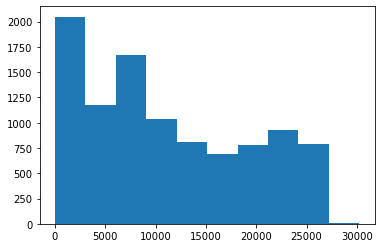

In [22]:
print(compare.loc[compare['monthly_mean_availn']>0, 'monthly_mean_vegc'].describe())
plt.hist(compare.loc[compare['monthly_mean_availn']>0, 'monthly_mean_vegc'])

In [35]:
reg_8.loc[(reg_8['variable'] ==' LAI ')].groupby('model')['monthly_mean'].mean()

model
AWIxxCMxx1xx1xxMR    2.083097
BCCxxCSM2xxMR        1.964330
CanESM5              1.728945
MIROC6               2.683766
MPIxxESM1xx2xxHR     2.124745
MPIxxESM1xx2xxLR     2.037710
MRIxxESM2xx0         2.252453
Name: monthly_mean, dtype: float64

In [105]:
variable_columns

array([' AVAILN ', ' GPP ', ' LAI ', ' NCE ', ' NEP ', ' NETNMIN ',
       ' NPP ', ' SOILORGC ', ' VEGC ', ' VEGINNPP ', ' VSM '],
      dtype=object)

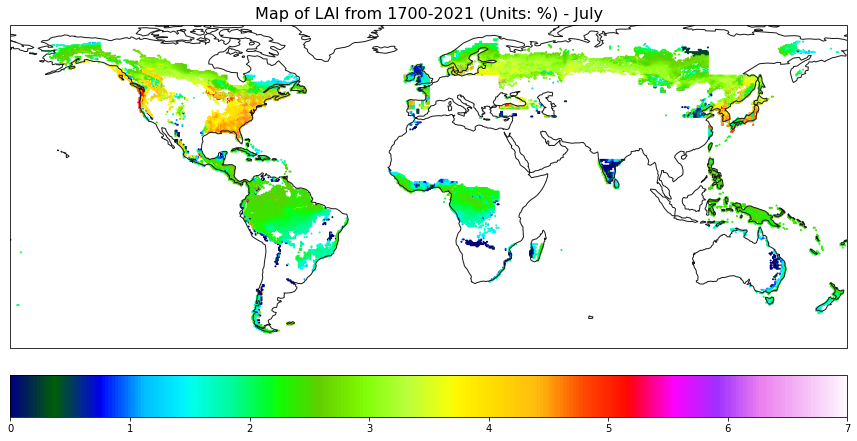

In [112]:
# Loop through each unique variable and create an individual plot.
plt.figure(figsize=(15, 10))  # Create a new figure for each plot with the specified size.
ax = plt.axes(projection=ccrs.PlateCarree())  # Create an axis with the PlateCarree projection.
ax.coastlines(color="0.1")

# Get units for the current variable.
units = variable_units[i]

# Define the min and max quantile values for the current variable's monthly mean.

# Filter the data for the current variable and within the quantile limits.
plot_data = map_data.loc[
    (map_data['variable'] == ' LAI ') 
]

# Create the plot.
plot = plot_data.plot(ax=ax, cmap='gist_ncar', column='Jul', legend=True,
                      markersize=1,
                      legend_kwds={"location": "bottom", "pad": 0.05})

# Set the title for the current plot.
ax.set_title(f'Map of LAI from 1700-2021 (Units: %) - July', fontsize=16)

plt.show()  # Display the current plot before moving to the next variable.

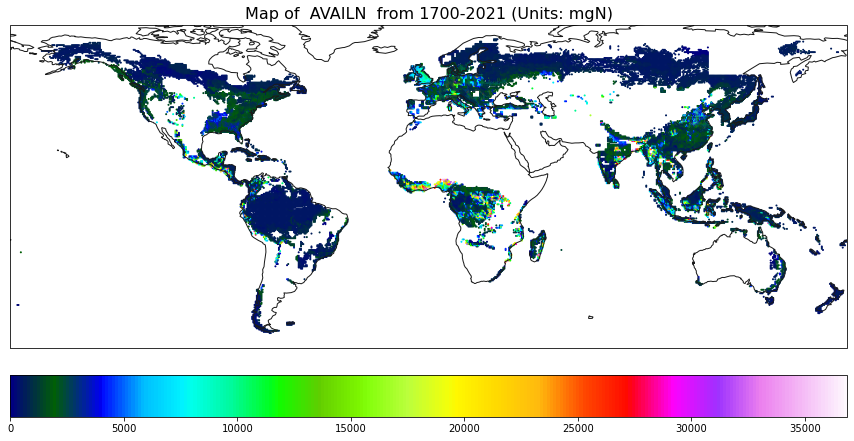

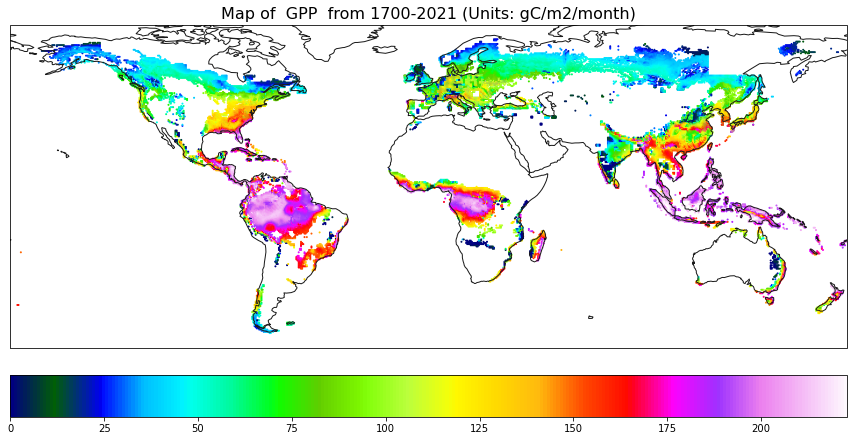

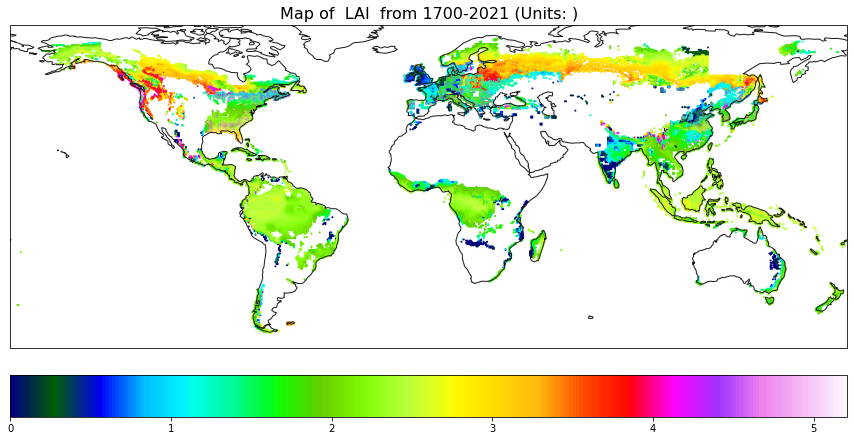

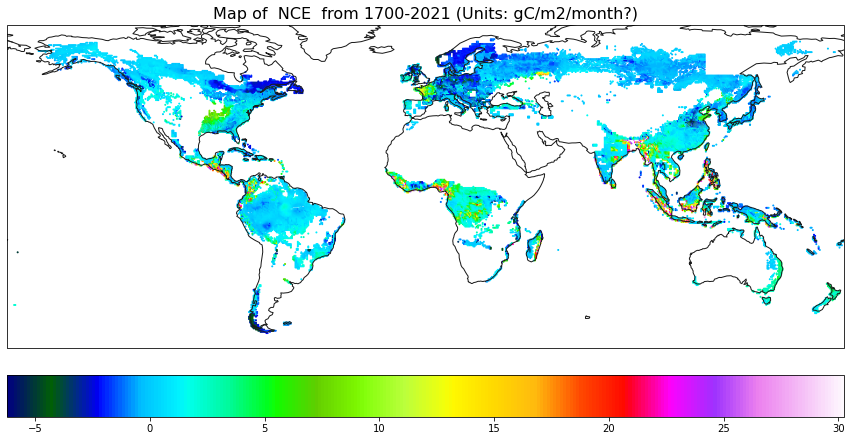

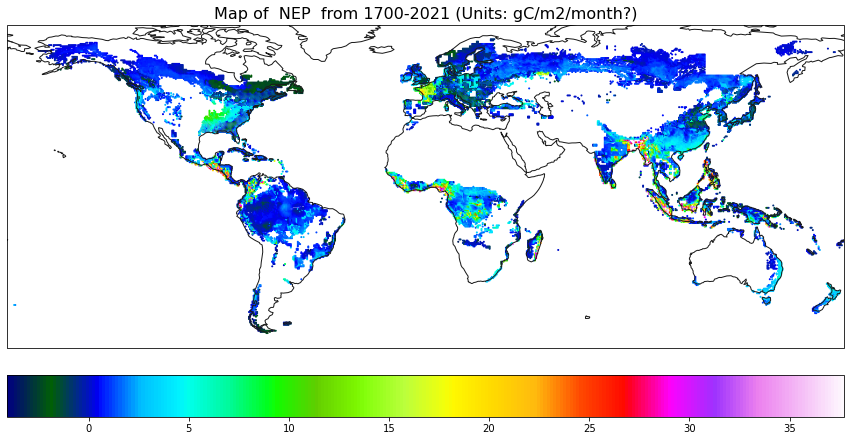

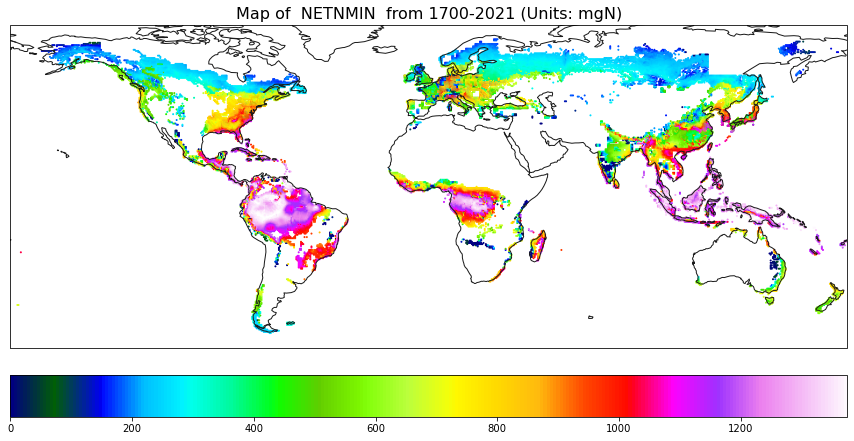

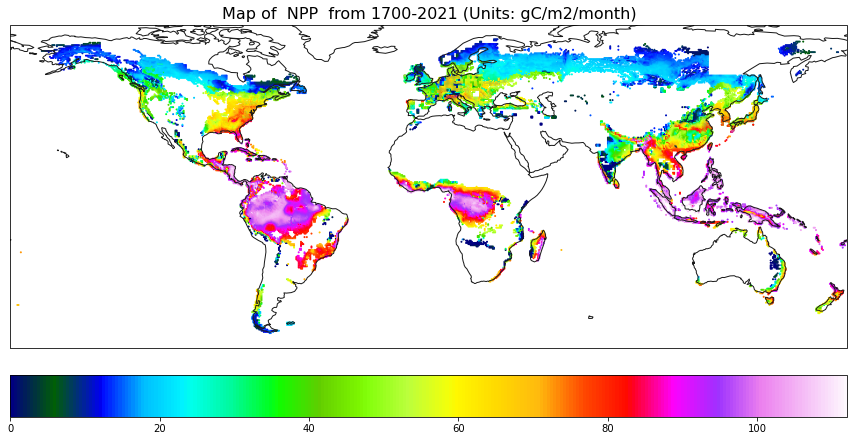

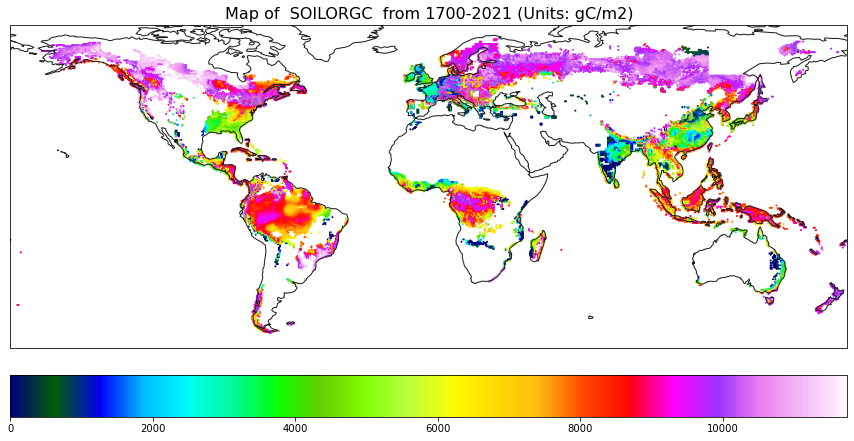

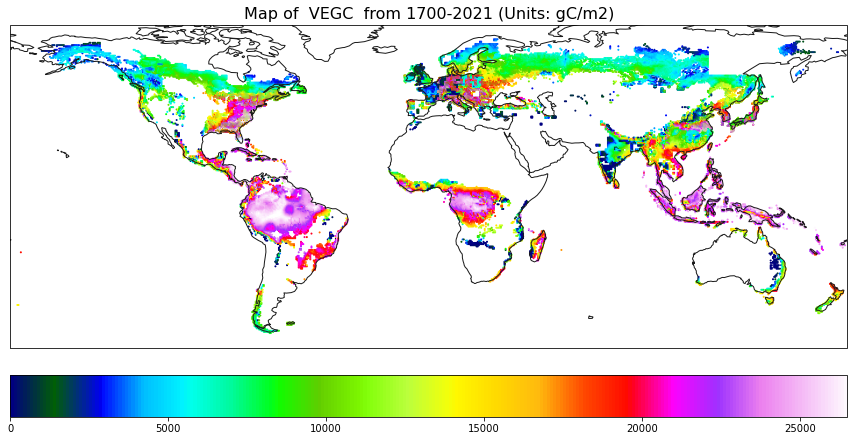

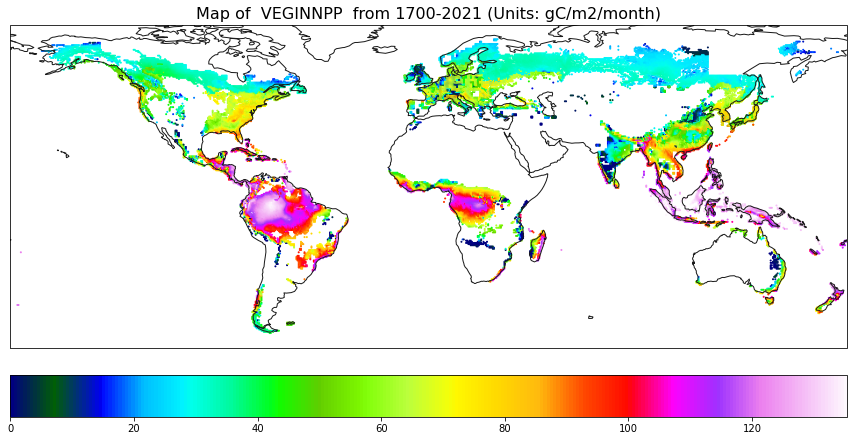

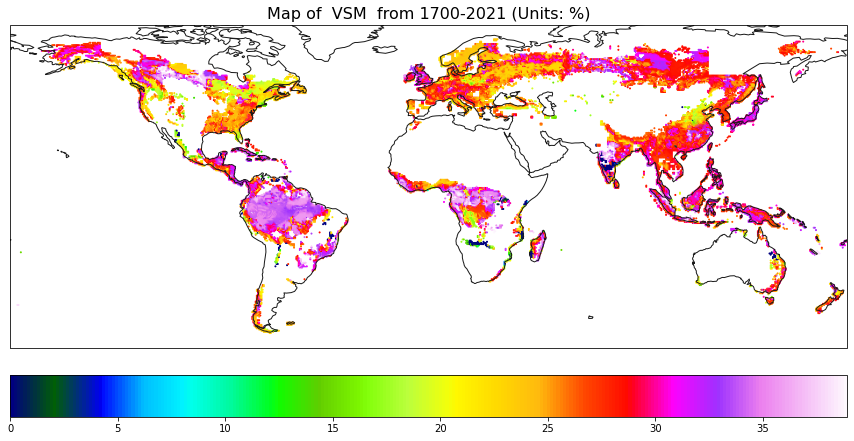

In [23]:
# Loop through each unique variable and create an individual plot.
for i, var in enumerate(variable_columns):
    plt.figure(figsize=(15, 10))  # Create a new figure for each plot with the specified size.
    ax = plt.axes(projection=ccrs.PlateCarree())  # Create an axis with the PlateCarree projection.
    ax.coastlines(color="0.1")
    
    # Get units for the current variable.
    units = variable_units[i]
    
    # Define the min and max quantile values for the current variable's monthly mean.
    min_val = map_data.loc[
        (map_data['variable'] == var), 'monthly_mean' ].quantile(.01)
    max_val = map_data.loc[
        (map_data['variable'] == var), 'monthly_mean' ].quantile(.99)
    
    # Filter the data for the current variable and within the quantile limits.
    plot_data = map_data.loc[
        (map_data['variable'] == var) &
        (map_data['monthly_mean'].between(min(0,min_val), max_val))
    ]
    
    # Create the plot.
    plot = plot_data.plot(ax=ax, cmap='gist_ncar', column='monthly_mean', legend=True,
                          markersize=1,
                          legend_kwds={"location": "bottom", "pad": 0.05})
    
    # Set the title for the current plot.
    ax.set_title(f'Map of {var} from 1700-2021 (Units: {units})', fontsize=16)
    
    plt.show()  # Display the current plot before moving to the next variable.

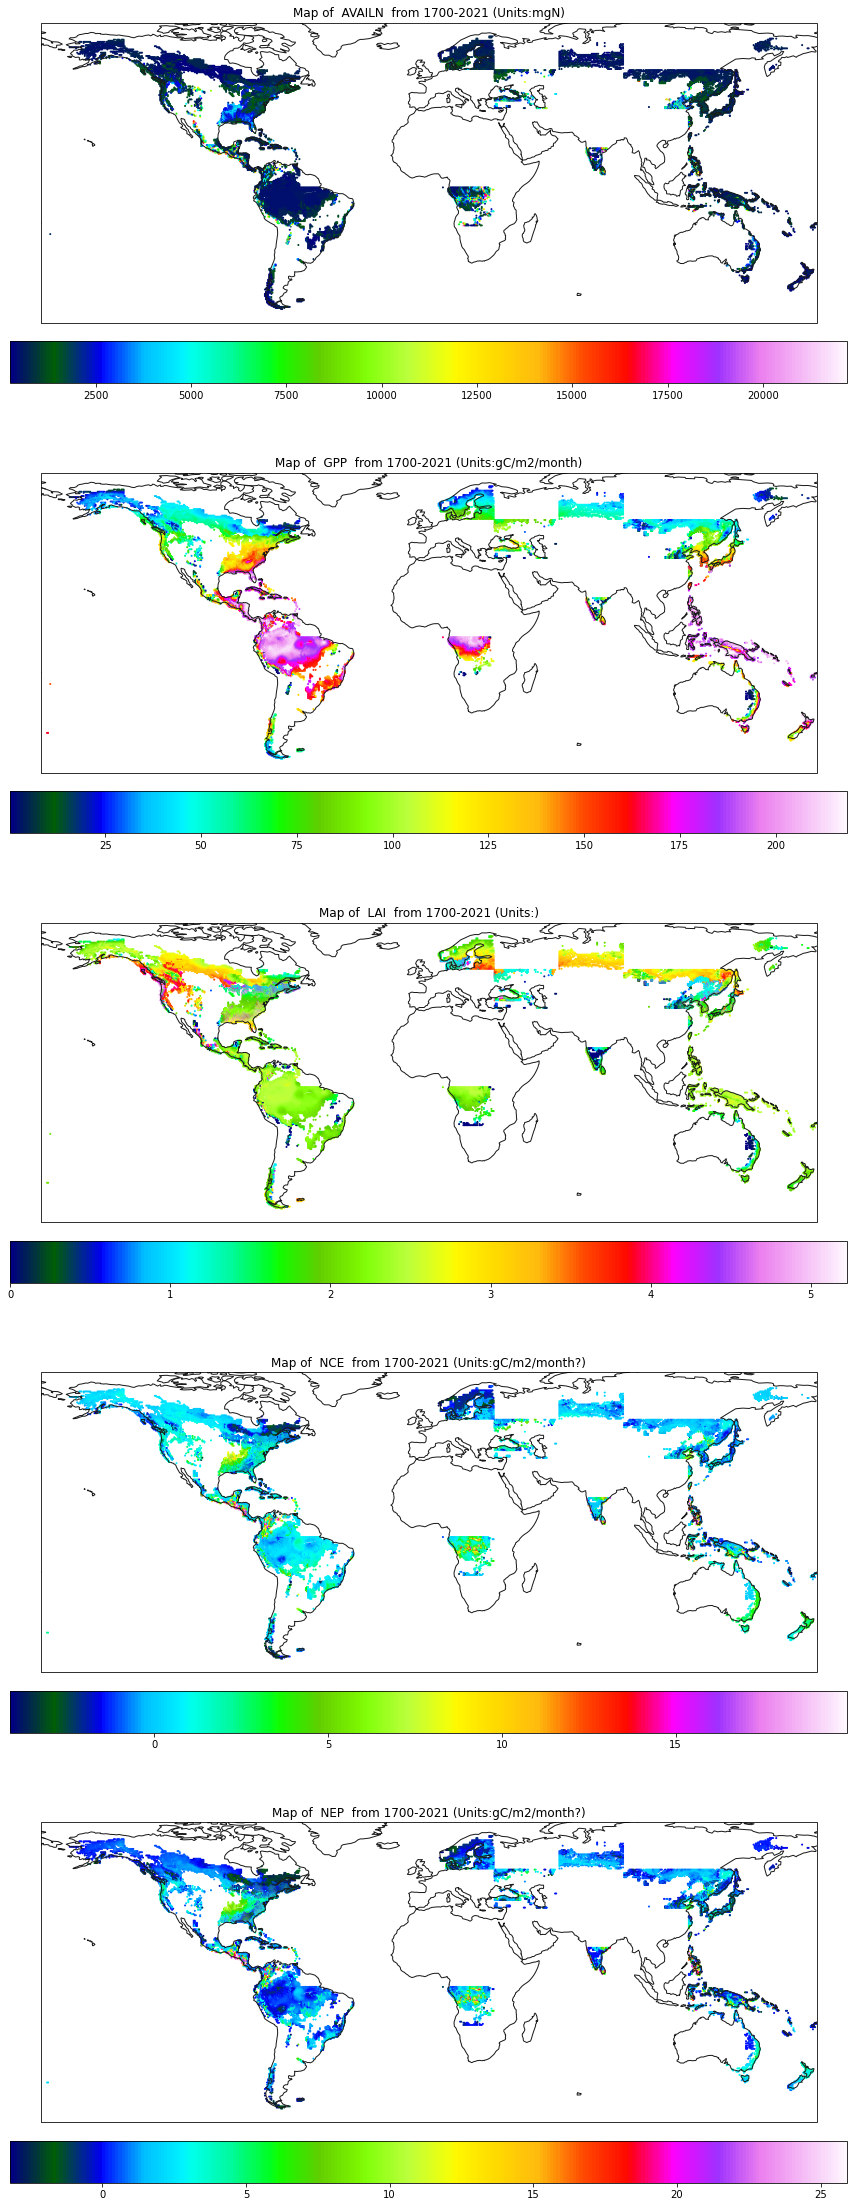

In [88]:
variable_columns = map_data['variable'].unique()

# Number of plots, one for each variable
number_of_plots = len(variable_columns)

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 10 * 4),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# If there is only one variable, axs will not be an array, so we make it into a list for consistency.
if number_of_plots == 1:
    axs = [axs]

for i, var in enumerate(variable_columns[0:5]):
    # var = variable_columns[i]
    units = variable_units[i]

    ax = axs[i]  # Select the ax for the current plot
    ax.coastlines(color="0.1")
    min_val = map_data.loc[
    (map_data['variable'] == var)
   , 'monthly_mean' ].quantile(.01)
    max_val = map_data.loc[
    (map_data['variable'] == var)
   , 'monthly_mean' ].quantile(.99)
    
    
    plot = map_data.loc[
    (map_data['variable'] == var)
    &(map_data['monthly_mean'].between(min_val, max_val))
        # &(map_data['year']>1900)
    ].plot(ax=ax, cmap='gist_ncar', column='monthly_mean', legend=True,
                          markersize=1,
                         legend_kwds={"location": "bottom", "pad": 0.05})
    ax.set_title(f'Map of {var} from 1700-2021 (Units:{units})')  # Set the title for each subplot

plt.show()  # Display the plots

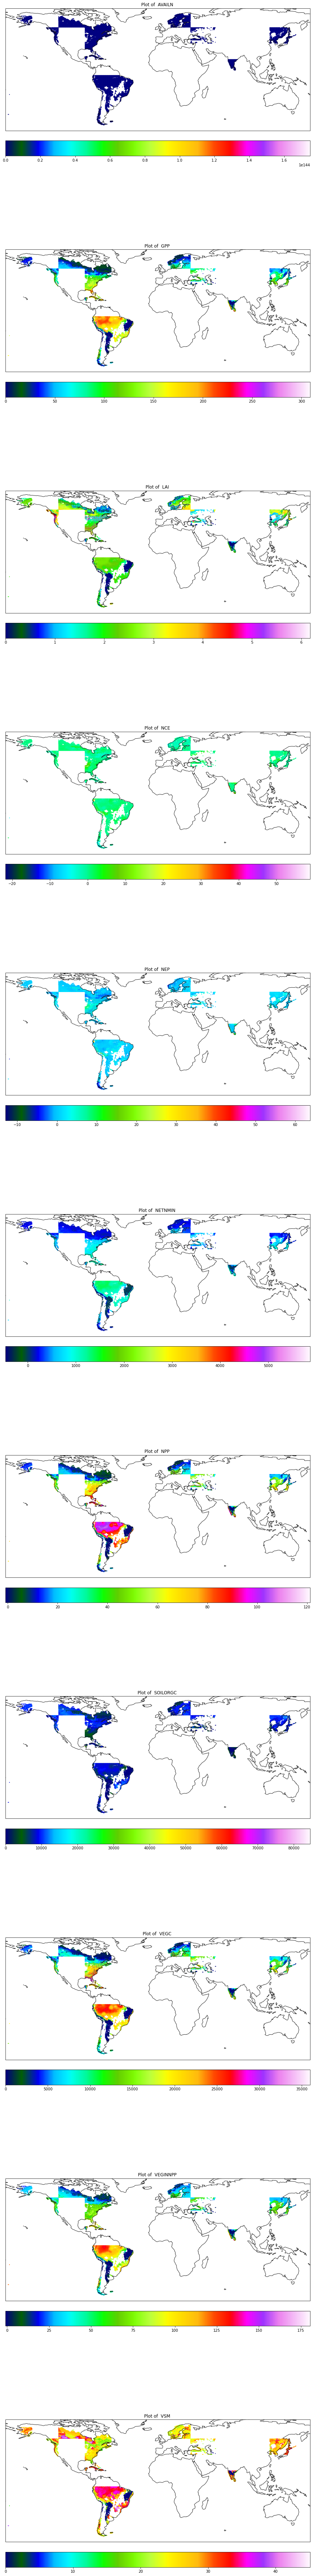

In [12]:
variable_columns = map_data['variable'].unique()

# Number of plots, one for each variable
number_of_plots = len(variable_columns)

fig, axs = plt.subplots(nrows=number_of_plots, ncols=1, figsize=(15, 12 * number_of_plots),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# If there is only one variable, axs will not be an array, so we make it into a list for consistency.
if number_of_plots == 1:
    axs = [axs]

for i, var in enumerate(variable_columns):
    ax = axs[i]  # Select the ax for the current plot
    ax.coastlines(color="0.1")

    plot = map_data.loc[
    map_data['variable'] == var
    ].plot(ax=ax, cmap='gist_ncar', column='monthly_mean', legend=True,
                          markersize=1,
                         legend_kwds={"location": "bottom", "pad": 0.05})
    ax.set_title(f'Plot of {var}')  # Set the title for each subplot

plt.show()  # Display the plots